# 第六組第一次讀書會報告
資料取得：Tarflow</br>
資料來源：PTT科技工作版、PTT軟體工作版</br>
時間範圍：2021/01/01 ~ 2023/03/23</br>
關鍵字：實習、面試

## 1. 資料前處理

### 1.1 前置作業

套件引入

In [359]:
import pandas as pd
import jieba
import jieba.analyse
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import time
from matplotlib.colors import Colormap
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
%matplotlib inline

繪圖設定

In [360]:
# 設定圖的字體大小
plt.rcParams['font.size'] = 14

# 設定圖的中文字體 (無法顯示的話可以試試‘Microsoft JhengHei’字體)
# 也可參考：https://pyecontech.com/2020/03/27/python_matplotlib_chinese/
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# 設定文字雲中文字體路徑
FontPath = 'SourceHanSansTW-Regular.otf' # 設定字型

帶入文字資料

In [361]:
df = pd.read_csv('raw_data/job_intern.csv')
df

system_id                                             artUrl  \
0             1  https://www.ptt.cc/bbs/Soft_Job/M.1609607079.A...   
1             2  https://www.ptt.cc/bbs/Soft_Job/M.1609690015.A...   
2             3  https://www.ptt.cc/bbs/Soft_Job/M.1609749486.A...   
3             4  https://www.ptt.cc/bbs/Soft_Job/M.1609749525.A...   
4             5  https://www.ptt.cc/bbs/Soft_Job/M.1609899065.A...   
...         ...                                                ...   
4739       4740  https://www.ptt.cc/bbs/Tech_Job/M.1711081189.A...   
4740       4741  https://www.ptt.cc/bbs/Tech_Job/M.1711086841.A...   
4741       4742  https://www.ptt.cc/bbs/Tech_Job/M.1711102030.A...   
4742       4743  https://www.ptt.cc/bbs/Tech_Job/M.1711106366.A...   
4743       4744  https://www.ptt.cc/bbs/Tech_Job/M.1711112298.A...   

                                     artTitle              artDate  \
0                        [請益]困在疫區的菜鳥工程師求職，求建議  2021-01-03 01:04:37   
1                 [請益]中年人請問轉職雲端(devops/SRE)工作  2021-01-04 00:06:51   
2     Fw:[徵才]Gogoro招募前端/後端/Android/Data/QA/PM  2021-01-04 16:38:05   
3            Fw:[徵才]矽谷新創閃電核心招募分散運算/前端/設計/行銷總監  2021-01-04 16:38:44   
4             [徵才]怡忠科技徵Java軟體工程師(45~55K/0~1Y)  2021-01-06 10:11:02   
...                                       ...                  ...   
4739                Re:[新聞]竹科還在裁員「清大生待業1年」嘸頭路  2024-03-22 12:19:47   
4740                Re:[新聞]竹科還在裁員「清大生待業1年」嘸頭路  2024-03-22 13:53:57   
4741                Re:[新聞]竹科還在裁員「清大生待業1年」嘸頭路  2024-03-22 18:07:08   
4742                 [新聞]美司法部控壟斷蘋果市值一天蒸發1130億  2024-03-22 19:19:18   
4743                                 [面試]合晶科技  2024-03-22 20:58:16   

        artPoster artCatagory  \
0       Metonymia    Soft_Job   
1         lue0083    Soft_Job   
2         hcd1983    Soft_Job   
3         hcd1983    Soft_Job   
4      chiushandy    Soft_Job   
...           ...         ...   
4739     iahc5566    Tech_Job   
4740     timtdsas    Tech_Job   
4741     sxy67230    Tech_Job   
4742  createlight    Tech_Job   
4743   shotholisi    Tech_Job   

                                             artContent  \
0     各位大大工程師跟年薪百萬版友大家好，新年快樂～\n潛水已久的弱弱菜鳥我希望能徵詢一下大家的意...   
1     大家好\n\n有點年紀了也怕思考上有盲點而做錯決定，畢竟年紀越大做錯決定的成本就越高，故想跟...   
2     作者: dolinian (杜麗娘) 看板: Tech_Job\n標題: [徵才] Gogo...   
3     作者: dolinian (杜麗娘) 看板: Tech_Job\n標題: [徵才]矽谷新創閃...   
4     公司名稱，統編(中華民國以外註冊可免填):\n怡忠科技股份有限公司 (統編: 5457254...   
...                                                 ...   
4739  推文噴太兇了\n\n其實清大找不到真的是有可能的\n\n1.好的研發缺競爭太大\n可能只開一...   
4740  阿肥朋友最近找工作，來分享一下看法。\n海大資工學 + 清大電機碩，新鮮人，碩論非IC相關，...   
4741  阿肥外商碼農阿肥啦！\n\n阿就疫情紅利時代過了，那個時候疫情紅利還在的年代(兩年前），阿肥...   
4742  https://www.ntdtv.com.tw/b5/20240322/video/386...   
4743  https://www.104.com.tw/job/7pmpz?jobsource=ind...   

                                             artComment            e_ip  \
0     [{"cmtStatus": "推", "cmtPoster": "ntpuisbest",...  208.82.100.226   
1     [{"cmtStatus": "推", "cmtPoster": "jack0204", "...  118.166.143.56   
2     [{"cmtStatus": "→", "cmtPoster": "wulouise", "...  220.135.205.37   
3     [{"cmtStatus": "推", "cmtPoster": "a8989332", "...  220.135.205.37   
4                                                    []   211.75.233.25   
...                                                 ...             ...   
4739  [{"cmtStatus": "推", "cmtPoster": "b122771", "c...     1.200.5.197   
4740  [{"cmtStatus": "推", "cmtPoster": "iahc5566", "...  111.82.198.206   
4741  [{"cmtStatus": "→", "cmtPoster": "MRFROG", "cm...   101.10.93.200   
4742  [{"cmtStatus": "推", "cmtPoster": "Tohkachan", ...   114.39.42.104   
4743  [{"cmtStatus": "推", "cmtPoster": "b122771", "c...   49.218.91.197   

             insertedDate dataSource  
0     2021-01-04 00:49:17        ptt  
1     2021-01-04 00:49:17        ptt  
2     2021-01-05 00:48:04        ptt  
3     2021-01-05 00:48:04        ptt  
4     2021-01-07 06:48:54        ptt  
...                   ...        ...  
4739  2024-03-23 02:11:13        ptt  
4740 

### 1.2 資料初步清理
- 清除內文為空值的文章

- 透過觀察發現ptt的文章常用兩個換行符號作為句子的結尾，因此將兩個換行取代為句號。

- 清除不重要的字如換行、網址

- 把日期時間改成只留下日期以便後續做情緒分析

In [362]:
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

#清除日期欄位的時間
clear_df["artDate"] = pd.to_datetime(clear_df["artDate"])
clear_df['artDate'] = clear_df['artDate'].dt.date
clear_df

artUrl  \
0     https://www.ptt.cc/bbs/Soft_Job/M.1609607079.A...   
1     https://www.ptt.cc/bbs/Soft_Job/M.1609690015.A...   
2     https://www.ptt.cc/bbs/Soft_Job/M.1609749486.A...   
3     https://www.ptt.cc/bbs/Soft_Job/M.1609749525.A...   
4     https://www.ptt.cc/bbs/Soft_Job/M.1609899065.A...   
...                                                 ...   
4739  https://www.ptt.cc/bbs/Tech_Job/M.1711081189.A...   
4740  https://www.ptt.cc/bbs/Tech_Job/M.1711086841.A...   
4741  https://www.ptt.cc/bbs/Tech_Job/M.1711102030.A...   
4742  https://www.ptt.cc/bbs/Tech_Job/M.1711106366.A...   
4743  https://www.ptt.cc/bbs/Tech_Job/M.1711112298.A...   

                                     artTitle     artDate  \
0                        [請益]困在疫區的菜鳥工程師求職，求建議  2021-01-03   
1                 [請益]中年人請問轉職雲端(devops/SRE)工作  2021-01-04   
2     Fw:[徵才]Gogoro招募前端/後端/Android/Data/QA/PM  2021-01-04   
3            Fw:[徵才]矽谷新創閃電核心招募分散運算/前端/設計/行銷總監  2021-01-04   
4             [徵才]怡忠科技徵Java軟體工程師(45~55K/0~1Y)  2021-01-06   
...                                       ...         ...   
4739                Re:[新聞]竹科還在裁員「清大生待業1年」嘸頭路  2024-03-22   
4740                Re:[新聞]竹科還在裁員「清大生待業1年」嘸頭路  2024-03-22   
4741                Re:[新聞]竹科還在裁員「清大生待業1年」嘸頭路  2024-03-22   
4742                 [新聞]美司法部控壟斷蘋果市值一天蒸發1130億  2024-03-22   
4743                                 [面試]合晶科技  2024-03-22   

                                             artContent  \
0     各位大大工程師跟年薪百萬版友大家好，新年快樂～\n潛水已久的弱弱菜鳥我希望能徵詢一下大家的意...   
1     大家好\n\n有點年紀了也怕思考上有盲點而做錯決定，畢竟年紀越大做錯決定的成本就越高，故想跟...   
2     作者: dolinian (杜麗娘) 看板: Tech_Job\n標題: [徵才] Gogo...   
3     作者: dolinian (杜麗娘) 看板: Tech_Job\n標題: [徵才]矽谷新創閃...   
4     公司名稱，統編(中華民國以外註冊可免填):\n怡忠科技股份有限公司 (統編: 5457254...   
...                                                 ...   
4739  推文噴太兇了\n\n其實清大找不到真的是有可能的\n\n1.好的研發缺競爭太大\n可能只開一...   
4740  阿肥朋友最近找工作，來分享一下看法。\n海大資工學 + 清大電機碩，新鮮人，碩論非IC相關，...   
4741  阿肥外商碼農阿肥啦！\n\n阿就疫情紅利時代過了，那個時候疫情紅利還在的年代(兩年前），阿肥...   
4742  https://www.ntdtv.com.tw/b5/20240322/video/386...   
4743  https://www.104.com.tw/job/7pmpz?jobsource=ind...   

                                               sentence  
0     各位大大工程師跟年薪百萬版友大家好，新年快樂～，潛水已久的弱弱菜鳥我希望能徵詢一下大家的意見...  
1     大家好。有點年紀了也怕思考上有盲點而做錯決定，畢竟年紀越大做錯決定的成本就越高，故想跟，前輩...  
2     作者: dolinian (杜麗娘) 看板: Tech_Job，標題: [徵才] Gogor...  
3     作者: dolinian (杜麗娘) 看板: Tech_Job，標題: [徵才]矽谷新創閃電...  
4     公司名稱，統編(中華民國以外註冊可免填):，怡忠科技股份有限公司 (統編: 54572547...  
...                                                 ...  
4739  推文噴太兇了。其實清大找不到真的是有可能的。1.好的研發缺競爭太大，可能只開一兩個但來面試的...  
4740  阿肥朋友最近找工作，來分享一下看法。，海大資工學 + 清大電機碩，新鮮人，碩論非IC相關，有...  
4741  阿肥外商碼農阿肥啦！。阿就疫情紅利時代過了，那個時候疫情紅利還在的年代(兩年前），阿肥公司還...  
4742   蘋果市值一天蒸發1130億美元。【新唐人亞太台 2024 年 03 月 22 日訊】美國司...  
4743   43000-44000。夜班 47000-48000。以上含加班費用。歡迎該公司人資查核^...  

[4744 rows x 5 columns]

### 1.3 斷句
中文主要以標點符號進行斷句，並清除空的字串

In [433]:
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)

### 1.4 斷詞
斷詞引擎設定：使用 Jieba 當作斷詞系統</br>
還有加入自定義字典，像是"IT"、"PM"等職位簡稱，或是"C/C++"這種職位需求的程式語言

In [364]:
jieba.set_dictionary('dict/dict.txt')
jieba.load_userdict("dict/user_dict.txt")

Building prefix dict from d:\Desktop\社群媒體分析\Pratice\dict\dict.txt ...
Loading model from cache C:\Users\SHOW\AppData\Local\Temp\jieba.u1a049c805be07cb0c29eb658867a9299.cache
Loading model cost 0.746 seconds.
Prefix dict has been built successfully.


In [365]:
#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

In [366]:
word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

繪製文字雲

In [367]:
# Create a DataFrame containing the frequency counts of unique words
freq_df = pd.DataFrame(pd.value_counts(word_df['word']))

# Rename the columns to 'word' and 'count'
freq_df = freq_df.reset_index().rename(columns={'index': 'word', 'word': 'count'})

# Sort the DataFrame by the 'count' column in descending order
freq_df = freq_df.sort_values(by=['count'], ascending=False)

# Reset the index of the DataFrame
freq_df = freq_df.reset_index(drop=True)

In [368]:
# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

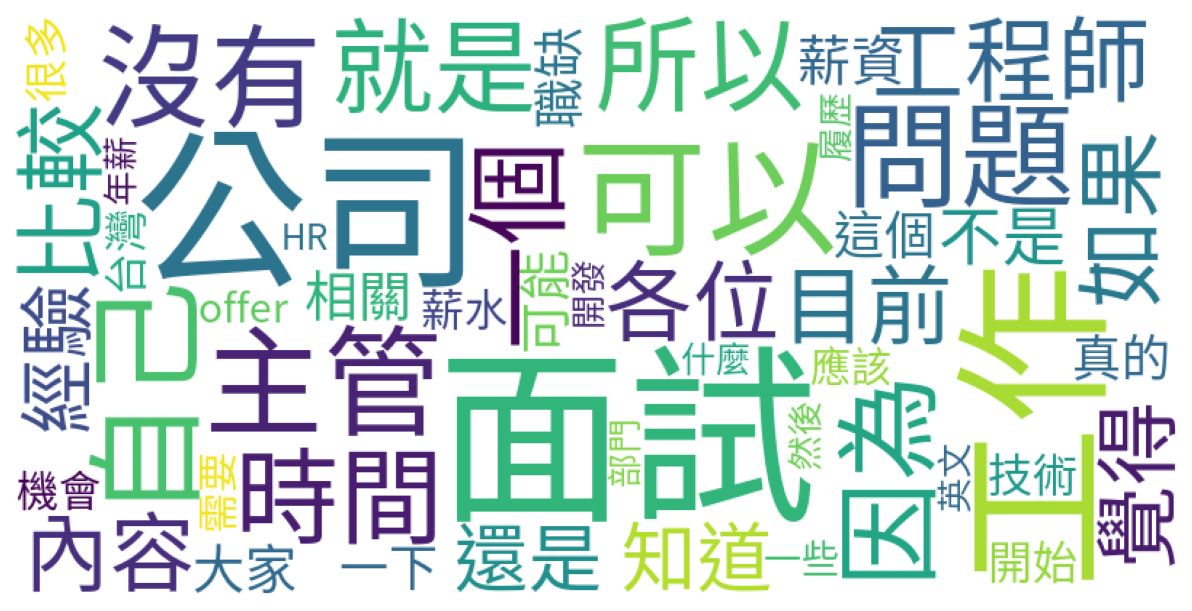

In [369]:
# 繪製文字雲
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 1.5 去除Stop Words

In [370]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 

In [371]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]

繪製文字雲

In [372]:
# Create a DataFrame containing the frequency counts of unique words
freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word']))

# Rename the columns to 'word' and 'count'
freq_df_nostop = freq_df_nostop.reset_index().rename(columns={'index': 'word', 'word': 'count'})

# Sort the DataFrame by the 'count' column in descending order
freq_df_nostop = freq_df_nostop.sort_values(by=['count'], ascending=False)

# Reset the index of the DataFrame
freq_df_nostop = freq_df_nostop.reset_index(drop=True)

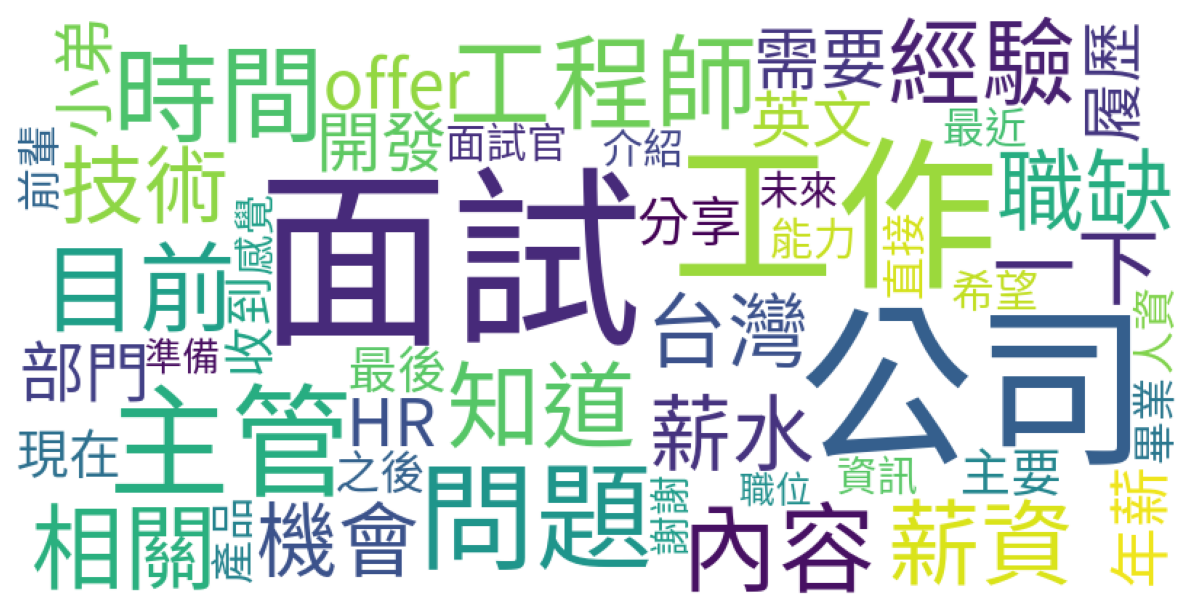

In [373]:
freq_dict_nostop = freq_df_nostop.set_index('word').to_dict()
freq_dict_nostop = freq_dict_nostop['count']

# 繪製文字雲
wordcloud_nostop = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_nostop.generate_from_frequencies(freq_dict_nostop)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_nostop)
plt.axis('off')
plt.show()

### 1.6 手動加入Stop Words
可以看到上方文字雲還是有許多不相關的詞，像是固定發文格式的詞</br>
所以手動加入這些詞再做斷詞

In [374]:
# 參數形式手動加入停用字
stopwords_manual = ["公司", "面試", "工作", "消費", "主要", "小弟", "現在", "謝謝", "收到", "之後", "感覺", "主管", "最近", "準備", "相關", "直接","希望","一下","目前","需要","最後","問題","時間","內容","知道","職缺","薪資"]
stopwords.extend(stopwords_manual)

In [375]:
# sent_df是還沒斷詞過的df
word_df_updated = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#把長度小於1的row刪掉
word_df_updated = word_df_updated.loc[word_df_updated['word'].str.len()>1]

In [376]:
nostop_df_updated = word_df_updated[~word_df_updated['word'].isin(stopwords)]

In [377]:
# sent_df是還沒斷詞過的df
word_df_updated = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#把長度小於1的row刪掉
word_df_updated = word_df_updated.loc[word_df_updated['word'].str.len()>1]

#去除停用字
nostop_df_updated = word_df_updated[~word_df_updated['word'].isin(stopwords)]

再次繪製文字雲

In [378]:
# Create a DataFrame containing the frequency counts of unique words
freq_df_updated = pd.DataFrame(pd.value_counts(nostop_df_updated['word']))

# Rename the columns to 'word' and 'count'
freq_df_updated = freq_df_updated.reset_index().rename(columns={'index': 'word', 'word': 'count'})

# Sort the DataFrame by the 'count' column in descending order
freq_df_updated = freq_df_updated.sort_values(by=['count'], ascending=False)

# Reset the index of the DataFrame
freq_df_updated = freq_df_updated.reset_index(drop=True)

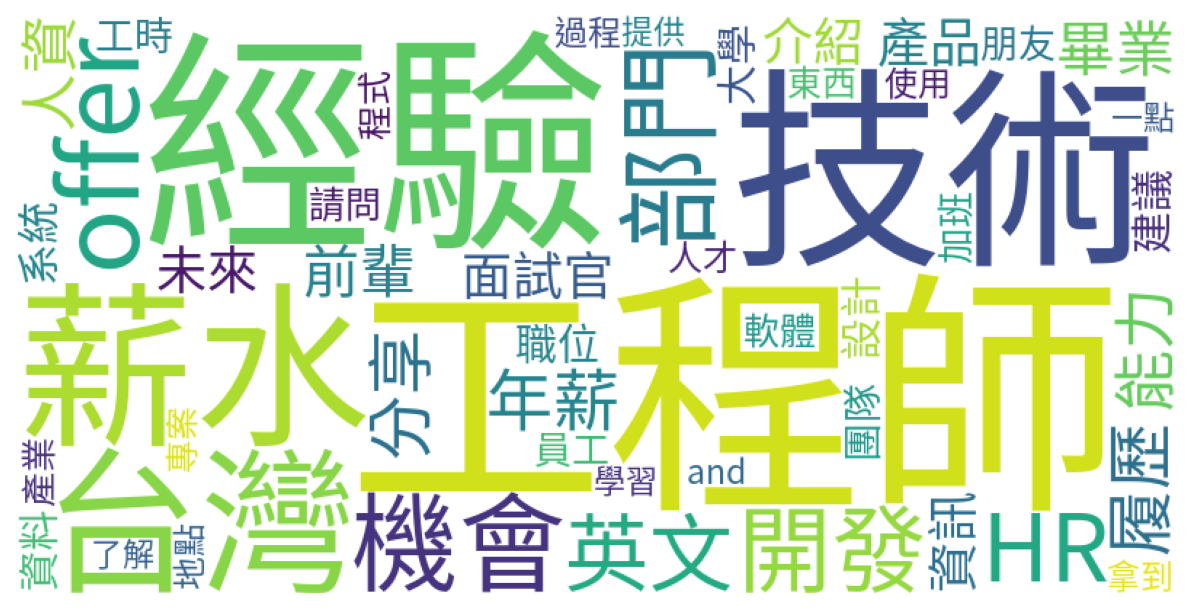

In [379]:
freq_dict_updated = freq_df_updated.set_index('word').to_dict()
freq_dict_updated = freq_dict_updated['count']

# 繪製文字雲
wordcloud_after = WordCloud(background_color='white', width=800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_after.generate_from_frequencies(freq_dict_updated)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_after)
plt.axis('off')
plt.show()

### 1.7 比較資料處理前後的文字雲

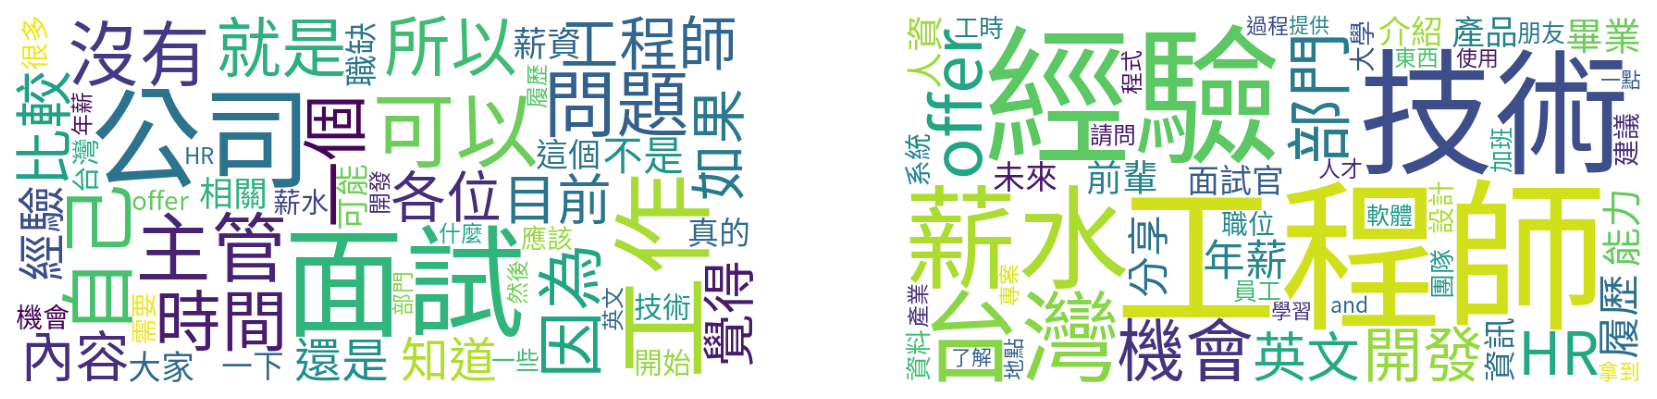

In [380]:
plt.figure(figsize = (14,8))

plt.subplot(1,2,1)
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_after)
plt.axis('off')

plt.show()

可以看到清理後少了很多對分析沒有幫助的字詞

## 2. 情緒分析

### 2.1 前置作業
使用LIWC字典

In [381]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})

In [382]:
liwc_dict['sentiments'].describe()

count       4682
unique         6
top       affect
freq        2061
Name: sentiments, dtype: object

情緒字典與斷詞結果進行合併

In [383]:
ptt_liwc_df = pd.merge(nostop_df_updated[["artUrl", "artDate", "artTitle", "artContent", "word"]], liwc_dict, how="left")
ptt_liwc_df

artUrl     artDate  \
0       https://www.ptt.cc/bbs/Soft_Job/M.1609607079.A...  2021-01-03   
1       https://www.ptt.cc/bbs/Soft_Job/M.1609607079.A...  2021-01-03   
2       https://www.ptt.cc/bbs/Soft_Job/M.1609607079.A...  2021-01-03   
3       https://www.ptt.cc/bbs/Soft_Job/M.1609607079.A...  2021-01-03   
4       https://www.ptt.cc/bbs/Soft_Job/M.1609607079.A...  2021-01-03   
...                                                   ...         ...   
687392  https://www.ptt.cc/bbs/Tech_Job/M.1711112298.A...  2024-03-22   
687393  https://www.ptt.cc/bbs/Tech_Job/M.1711112298.A...  2024-03-22   
687394  https://www.ptt.cc/bbs/Tech_Job/M.1711112298.A...  2024-03-22   
687395  https://www.ptt.cc/bbs/Tech_Job/M.1711112298.A...  2024-03-22   
687396  https://www.ptt.cc/bbs/Tech_Job/M.1711112298.A...  2024-03-22   

                    artTitle  \
0       [請益]困在疫區的菜鳥工程師求職，求建議   
1       [請益]困在疫區的菜鳥工程師求職，求建議   
2       [請益]困在疫區的菜鳥工程師求職，求建議   
3       [請益]困在疫區的菜鳥工程師求職，求建議   
4       [請益]困在疫區的菜鳥工程師求職，求建議   
...                      ...   
687392              [面試]合晶科技   
687393              [面試]合晶科技   
687394              [面試]合晶科技   
687395              [面試]合晶科技   
687396              [面試]合晶科技   

                                               artContent        word  \
0       各位大大工程師跟年薪百萬版友大家好，新年快樂～\n潛水已久的弱弱菜鳥我希望能徵詢一下大家的意...         工程師   
1       各位大大工程師跟年薪百萬版友大家好，新年快樂～\n潛水已久的弱弱菜鳥我希望能徵詢一下大家的意...          年薪   
2       各位大大工程師跟年薪百萬版友大家好，新年快樂～\n潛水已久的弱弱菜鳥我希望能徵詢一下大家的意...        百萬版友   
3       各位大大工程師跟年薪百萬版友大家好，新年快樂～\n潛水已久的弱弱菜鳥我希望能徵詢一下大家的意...          新年   
4       各位大大工程師跟年薪百萬版友大家好，新年快樂～\n潛水已久的弱弱菜鳥我希望能徵詢一下大家的意...          快樂   
...                                                   ...         ...   
687392  https://www.104.com.tw/job/7pmpz?jobsource=ind...          記得   
687393  https://www.104.com.tw/job/7pmpz?jobsource=ind...          修改   
687394  https://www.104.com.tw/job/7pmpz?jobsource=ind...  4300063000   
687395  https://www.104.com.tw/job/7pmpz?jobsource=ind...          特此   
687396  https://www.104.com.tw/job/7pmpz?jobsource=ind...          公佈   

       sentiments  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4          affect  
...           ...  
687392        NaN  
687393        NaN  
687394        NaN  
687395        NaN  
687396        NaN  

[687397 rows x 6 columns]

### 2.2 情緒詞頻分析

matplotlib設定

In [443]:
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] #使 matplotilb 中文能正常顯示
fprop = fm.FontProperties(fname="SourceHanSansTW-Regular.otf")

# 設定整份 notebook 圖片的長寬與 dpi
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 150
plt.rcParams['font.size'] = 14

計算正負向情緒詞彙

In [385]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count['sentiments'] == "positive") | (sentiment_count['sentiments'] == "negative") 
sentiment_count = sentiment_count.loc[mask]

sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

artDate sentiments  size
1     2021-01-01   negative     2
2     2021-01-01   positive    15
5     2021-01-02   negative     4
6     2021-01-02   positive    10
10    2021-01-03   negative    12
...          ...        ...   ...
4754  2024-03-20   positive     3
4756  2024-03-21   negative     3
4757  2024-03-21   positive     9
4760  2024-03-22   negative     4
4761  2024-03-22   positive    12

[1957 rows x 3 columns]

繪製折線圖

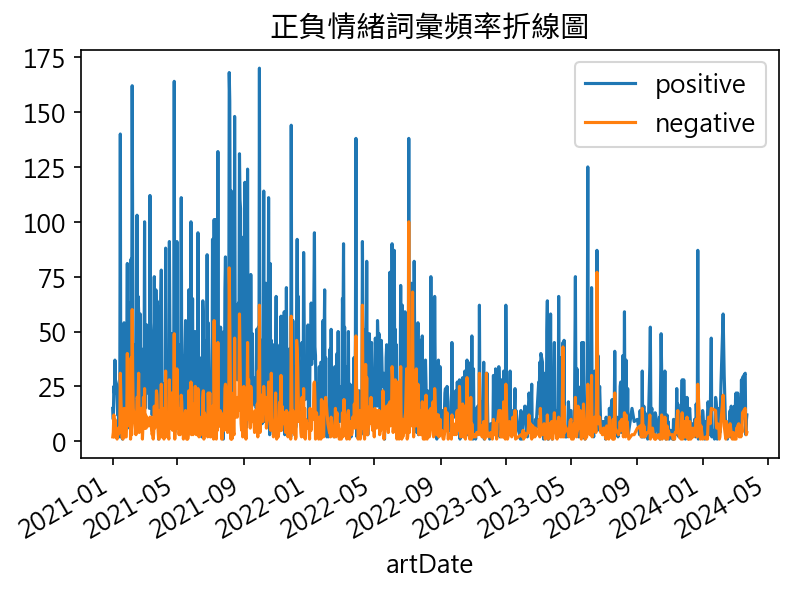

In [386]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒詞彙頻率折線圖", fontproperties=fprop)
plt.show()

以14天做rolling average再繪製一次折線圖

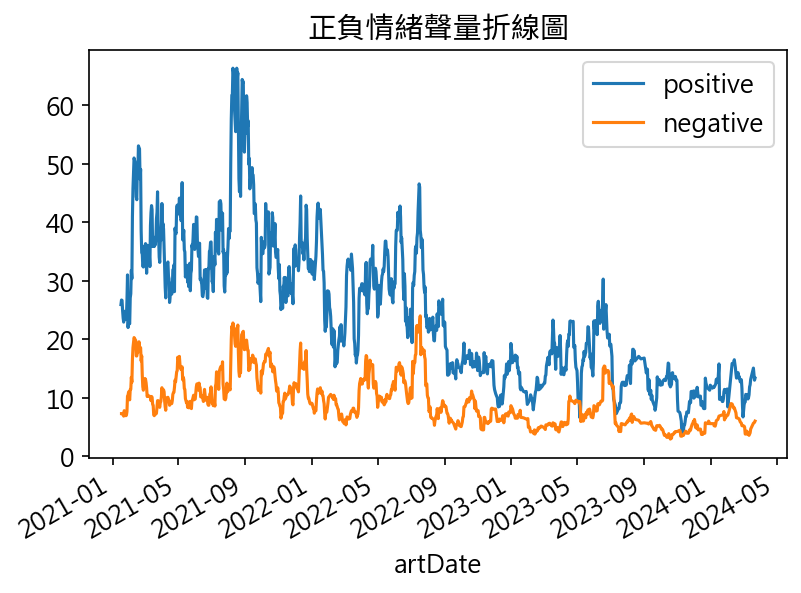

In [387]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒聲量折線圖", fontproperties=fprop)
plt.show()

### 2.3 情緒比例分析

In [388]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

artDate sentiments  size     ratio
1     2021-01-01   negative     2  0.117647
2     2021-01-01   positive    15  0.882353
5     2021-01-02   negative     4  0.285714
6     2021-01-02   positive    10  0.714286
10    2021-01-03   negative    12  0.324324
...          ...        ...   ...       ...
4754  2024-03-20   positive     3  1.000000
4756  2024-03-21   negative     3  0.250000
4757  2024-03-21   positive     9  0.750000
4760  2024-03-22   negative     4  0.250000
4761  2024-03-22   positive    12  0.750000

[1957 rows x 4 columns]

繪製折線圖

In [389]:
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

Text(0.5, 1.0, '正負情緒比例折線圖')

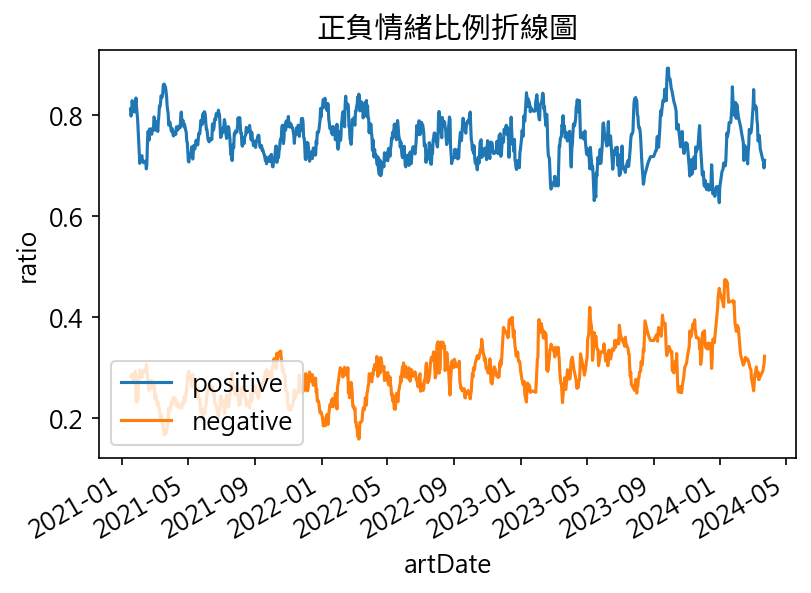

In [390]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

### 2.4 情緒分數分析

In [391]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

artDate  negative  positive
0  2021-01-01         2        15
1  2021-01-02         4        10
2  2021-01-03        12        25
3  2021-01-04         2        22
4  2021-01-05        10        37

In [392]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["negative"]
)
ptt_sentiment_value.head()

artDate  negative  positive  sentiment_value
0  2021-01-01         2        15               13
1  2021-01-02         4        10                6
2  2021-01-03        12        25               13
3  2021-01-04         2        22               20
4  2021-01-05        10        37               27

繪製折線圖

Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

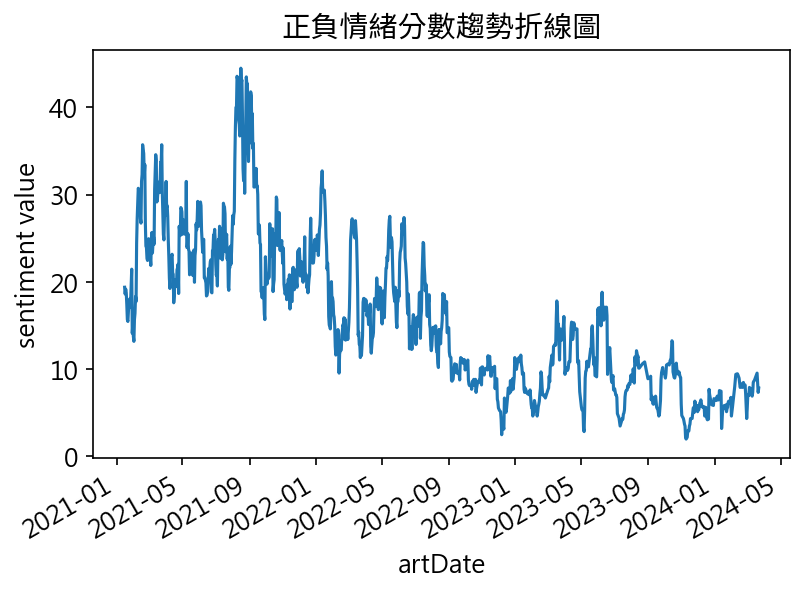

In [393]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖", fontproperties=fprop)

### 2.5 以文章為單位分析

In [456]:
sentiment_count_by_article = pd.DataFrame(
    ptt_liwc_df.groupby(["artUrl", "sentiments"]).size()
).reset_index()
sentiment_count_by_article = sentiment_count_by_article.rename(columns={0: "size"})

In [457]:
ptt_sentiment_value_by_article = (
    sentiment_count_by_article.pivot_table(
        index="artUrl", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value_by_article.head()

artUrl  affect  anger  anx  \
0  https://www.ptt.cc/bbs/Soft_Job/M.1609607079.A...      27      2    3   
1  https://www.ptt.cc/bbs/Soft_Job/M.1609690015.A...       6      0    0   
2  https://www.ptt.cc/bbs/Soft_Job/M.1609749486.A...       5      0    0   
3  https://www.ptt.cc/bbs/Soft_Job/M.1609749525.A...      13      0    0   
4  https://www.ptt.cc/bbs/Soft_Job/M.1609899065.A...      19      0    1   

   negative  positive  sad  
0         9        16    0  
1         0         6    0  
2         1         4    0  
3         1        11    0  
4         3        13    0

計算文章情緒分數

In [458]:
# sentiment 計算方式: positive - negative
ptt_sentiment_value_by_article["sentiment_value"] = (
    ptt_sentiment_value_by_article["positive"]
    - ptt_sentiment_value_by_article["negative"]
)
ptt_sentiment_value_by_article.head()

artUrl  affect  anger  anx  \
0  https://www.ptt.cc/bbs/Soft_Job/M.1609607079.A...      27      2    3   
1  https://www.ptt.cc/bbs/Soft_Job/M.1609690015.A...       6      0    0   
2  https://www.ptt.cc/bbs/Soft_Job/M.1609749486.A...       5      0    0   
3  https://www.ptt.cc/bbs/Soft_Job/M.1609749525.A...      13      0    0   
4  https://www.ptt.cc/bbs/Soft_Job/M.1609899065.A...      19      0    1   

   negative  positive  sad  sentiment_value  
0         9        16    0                7  
1         0         6    0                6  
2         1         4    0                3  
3         1        11    0               10  
4         3        13    0               10

根據文章情緒分數歸類成正負向

In [459]:
ptt_sentiment_value_by_article['sentiment_class'] = ptt_sentiment_value_by_article['sentiment_value'].apply(lambda x: "正向" if x > 0 else "負向" )

In [460]:
clear_df_sentiment = pd.merge(df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")
clear_df_sentiment["artDate"] = pd.to_datetime(clear_df_sentiment["artDate"])
clear_df_sentiment['artDate'] = clear_df_sentiment['artDate'].dt.date

依日期計算正負向文章數量

In [461]:
sentiment_art_count = pd.DataFrame(
    clear_df_sentiment.groupby(["artDate", "sentiment_class"]).size()
).reset_index()
sentiment_art_count = sentiment_art_count.rename(columns={0: "size"})
sentiment_art_count = sentiment_art_count.sort_values(["artDate"])
sentiment_art_count

artDate sentiment_class  size
0     2021-01-01              正向     2
1     2021-01-02              正向     4
2     2021-01-02              負向     1
3     2021-01-03              正向     3
4     2021-01-04              正向     4
...          ...             ...   ...
1556  2024-03-20              正向     1
1557  2024-03-21              正向     3
1558  2024-03-21              負向     2
1559  2024-03-22              正向     5
1560  2024-03-22              負向     1

[1561 rows x 3 columns]

繪製折線圖

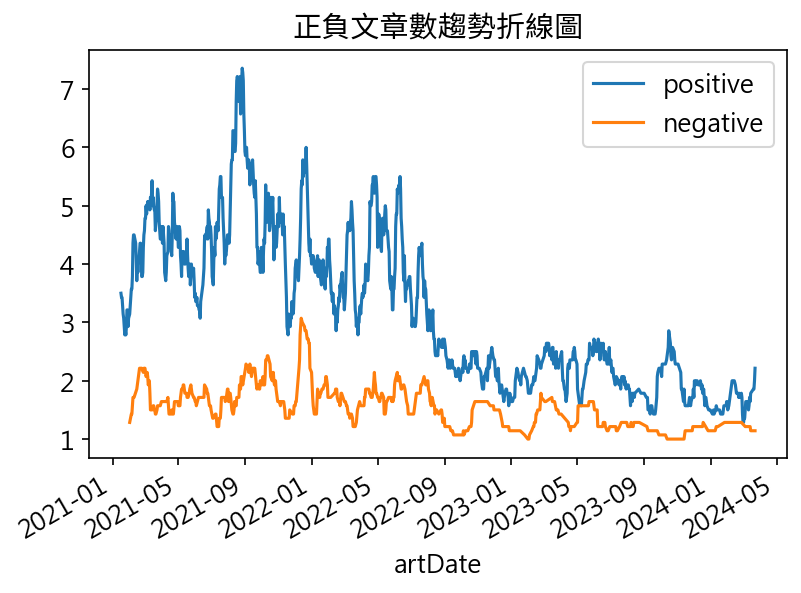

In [400]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_art_count[sentiment_art_count["sentiment_class"] == "正向"]
neg = sentiment_art_count[sentiment_art_count["sentiment_class"] == "負向"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])
# ax.plot(pos["artDate"], pos['size'], color=colors[0])
# ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負文章數趨勢折線圖", fontproperties=fprop)
plt.show()

可以看到正負面文章都有，但正面還是居多

### 2.6 情緒代表詞

In [446]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)

In [447]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]

In [448]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]

繪製長條圖

C:\Users\SHOW\AppData\Local\Temp\ipykernel_27212\391454114.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
C:\Users\SHOW\AppData\Local\Temp\ipykernel_27212\391454114.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(neg["word"], fontproperties=fprop)


Text(0.5, 1.0, '負向情緒總數')

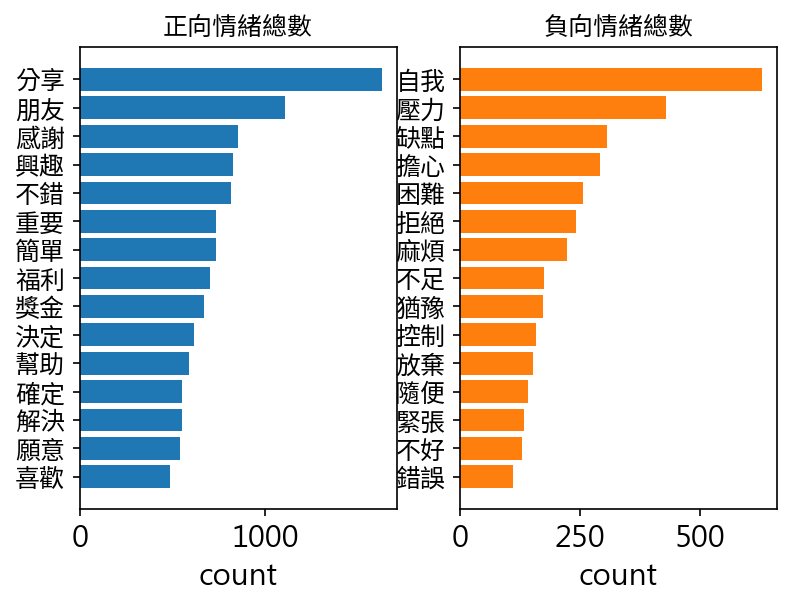

In [449]:
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

可以看到像"自我"、"分享"等詞語其實不代表真的是正面或負面情緒

手動清除不符合詞

In [450]:
# 設定要移除的字詞列表
words_to_remove = ['自我','分享','猶豫','控制','感謝','希望','問題','謝謝','朋友','興趣']
# 使用 ~ 運算子和 isin() 方法過濾掉包含在 words_to_remove 列表中的行
liwc_dict_revise = liwc_dict[~liwc_dict['word'].isin(words_to_remove)]
# 使用更新後的情緒字典 merge
ptt_liwc_df_revise = pd.merge(noStop_df[["artUrl", "artDate", "artTitle", "artContent","word"]], liwc_dict_revise, how="left")

再次繪製長條圖

C:\Users\SHOW\AppData\Local\Temp\ipykernel_27212\1465679712.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
C:\Users\SHOW\AppData\Local\Temp\ipykernel_27212\1465679712.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(neg["word"], fontproperties=fprop)


Text(0.5, 1.0, '負向情緒總數')

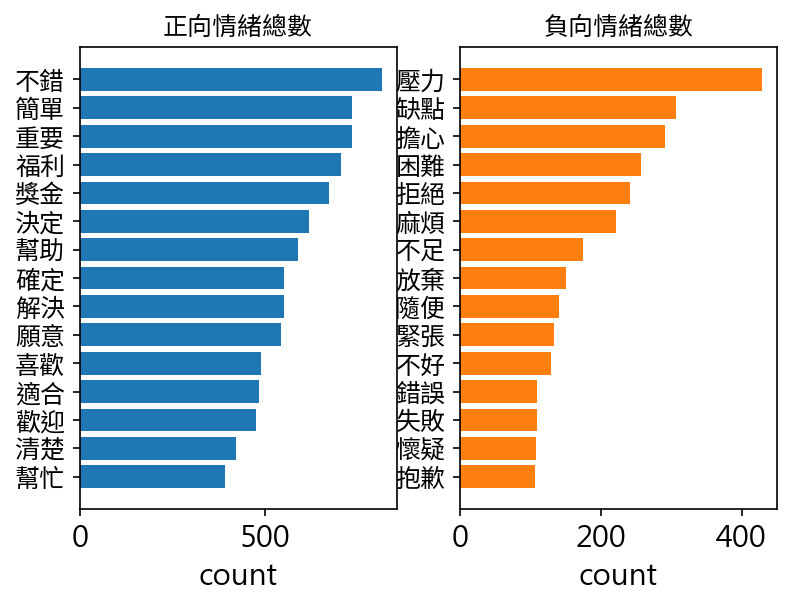

In [451]:
word_count = ptt_liwc_df_revise.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
pos = word_of_pos.head(15).sort_values(["size"], ascending=True)
neg = word_of_neg.head(15).sort_values(["size"], ascending=True)

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

重新繪製情緒分數趨勢圖

Text(0.5, 1.0, '正負情緒分數趨勢折線圖')

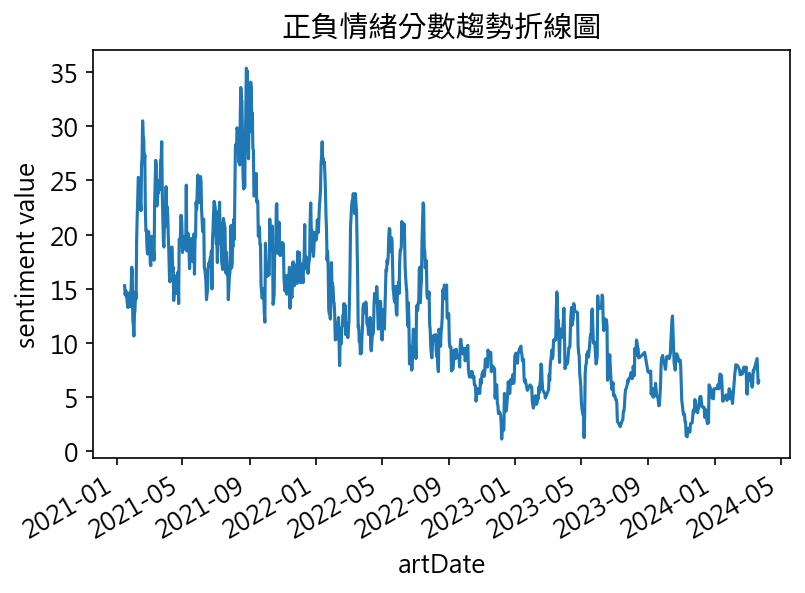

In [407]:
sentiment_count_revise = pd.DataFrame(
    ptt_liwc_df_revise.groupby(["artDate", "sentiments"]).size()
).reset_index()

mask = (sentiment_count_revise['sentiments'] == "positive") | (sentiment_count_revise['sentiments'] == "negative") 
sentiment_count_revise = sentiment_count_revise.loc[mask]

sentiment_count_revise = sentiment_count_revise.rename(columns={0: "size"})
sentiment_count_revise = sentiment_count_revise.sort_values(["artDate"])

ptt_sentiment_value_revise = (
    sentiment_count_revise.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)

# sentiment 計算方式: positive - negative
ptt_sentiment_value_revise["sentiment_value"] = (
    ptt_sentiment_value_revise["positive"]
    - ptt_sentiment_value_revise["negative"]
)

# 繪製情緒分數趨勢圖
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value_revise["artDate"], ptt_sentiment_value_revise["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()
plt.title("正負情緒分數趨勢折線圖", fontproperties=fprop)

### 2.7 文字雲呈現
這部分深入分析上圖2022/09到2023/03期間情緒分數出現低谷的情況，可能跟前陣子科技業景氣低迷有關

In [408]:
ptt_liwc_df_revise = pd.merge(ptt_liwc_df_revise, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")

In [409]:
sent_df = pd.merge(sent_df, ptt_sentiment_value_by_article[['artUrl', 'sentiment_class']], how="left")

取出2022/09到2023/03期間的負面文章

In [410]:
date = "2022-09-01"
end_date = "2023-01-01"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask]

In [411]:
date = "2022-09-01"
end_date = "2023-01-01"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & (
    ptt_liwc_df_revise['sentiment_class'] == "負向")

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]


word_count_count = pd.DataFrame(
    ptt_df_wc.groupby(["word"]).size()
).reset_index().rename(columns={0: "size"})
word_count_count = word_count_count.sort_values(by='size', ascending=False)
word_count_count

word  size
911    公司   144
1513   工作   111
3554   面試   106
663    主管    67
1175   問題    46
...   ...   ...
1477   小忙     1
1480   小月     1
1481  小朋友     1
1482   小組     1
3660   龜山     1

[3661 rows x 2 columns]

(-0.5, 399.5, 199.5, -0.5)

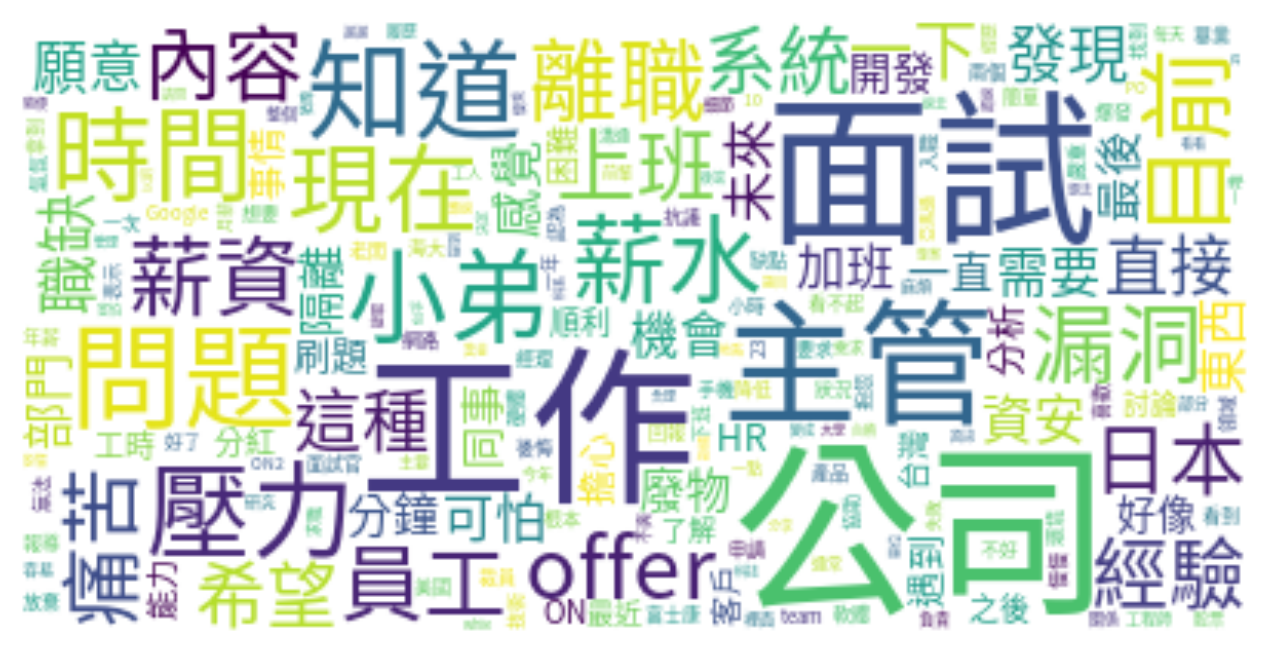

In [462]:
# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
wc_dict = dict(zip(word_count_count['word'], word_count_count['size']))
cloud = WordCloud(max_words=200, background_color="white", font_path=font_path)
cloud.generate_from_frequencies(wc_dict)
# 繪圖
plt.figure(figsize=(8, 4), dpi=200)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

可以看到有"公司"、"面試"等詞語，代表有針對某公司或面試過程的討論文章

所以這裡針對"公司"下去做分析，畫出文字雲

(-0.5, 399.5, 199.5, -0.5)

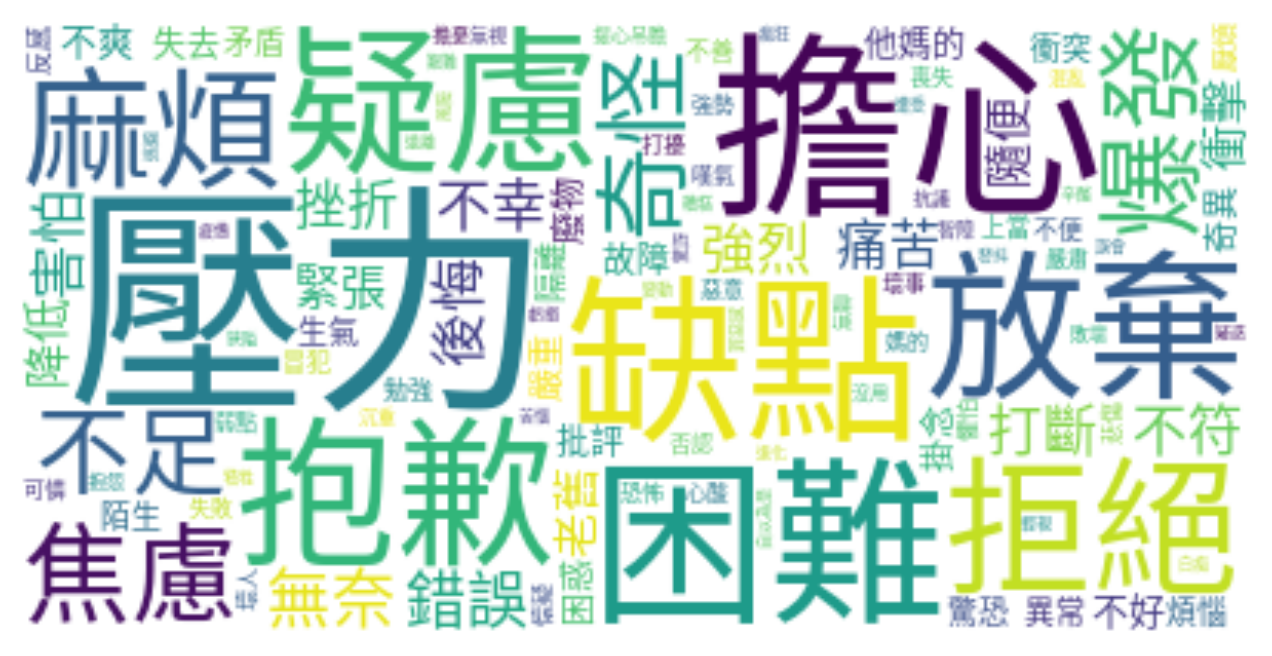

In [441]:
date = "2021-05-15"
end_date = "2021-09-15"
mask = (ptt_liwc_df_revise['artDate'] >= pd.Timestamp(date).date()) & (
    ptt_liwc_df_revise['artDate'] <= pd.Timestamp(end_date).date()) & ( # 時間區間
    ptt_liwc_df_revise['sentiment_class'] == "負向")  & ( # 負面文章
    ptt_liwc_df_revise['artContent'].str.contains('公司')) & ( # 內文包含公司
    ptt_liwc_df_revise["sentiments"] == "negative") # 負面情緒字

ptt_df_wc = ptt_liwc_df_revise.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()

# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, background_color="white", font_path=font_path)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=200)
plt.imshow(
    cloud, 
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

可以看到有各種負面字詞出現，所以再利用"壓力"這個詞去看原始文章

In [414]:
date = "2021-05-15"
end_date = "2021-09-15"
mask = (sent_df['artDate'] >= pd.Timestamp(date).date()) & (
    sent_df['artDate'] <= pd.Timestamp(end_date).date()) & (
    sent_df['sentiment_class'] == "負向") & (
    sent_df['artContent'].str.contains('公司')) & ( # 內文包含公司
    sent_df['sentence'].str.contains('壓力')) # 包含「壓力」的句子

df_ = sent_df.loc[mask, ["artDate", "artContent", "sentence"]]
index_list = df_.index.tolist()


# 取得前後各5筆的索引 => 目的為查看包含該詞彙句子的上下文
surrounding_indices = []
for index in index_list:
    surrounding_indices.extend(range(index - 5, index + 6))

# 去除重複的索引，並確保不超出範圍
surrounding_indices = list(set(filter(lambda x: x >= 0 and x < len(sent_df), surrounding_indices)))

# 依據索引取得相應的資料
result_df = sent_df.iloc[surrounding_indices].sort_index()
result_df

artUrl  \
18733   https://www.ptt.cc/bbs/Soft_Job/M.1625937257.A...   
18734   https://www.ptt.cc/bbs/Soft_Job/M.1625937257.A...   
18735   https://www.ptt.cc/bbs/Soft_Job/M.1625937257.A...   
18736   https://www.ptt.cc/bbs/Soft_Job/M.1625937257.A...   
18737   https://www.ptt.cc/bbs/Soft_Job/M.1625937257.A...   
...                                                   ...   
119843  https://www.ptt.cc/bbs/Tech_Job/M.1631643560.A...   
119844  https://www.ptt.cc/bbs/Tech_Job/M.1631643560.A...   
119845  https://www.ptt.cc/bbs/Tech_Job/M.1631643560.A...   
119846  https://www.ptt.cc/bbs/Tech_Job/M.1631643560.A...   
119847  https://www.ptt.cc/bbs/Tech_Job/M.1631643560.A...   

                   artTitle     artDate  \
18733   Fw:[問題]現在是個離職的好時機嗎？  2021-07-11   
18734   Fw:[問題]現在是個離職的好時機嗎？  2021-07-11   
18735   Fw:[問題]現在是個離職的好時機嗎？  2021-07-11   
18736   Fw:[問題]現在是個離職的好時機嗎？  2021-07-11   
18737   Fw:[問題]現在是個離職的好時機嗎？  2021-07-11   
...                     ...         ...   
119843     [請益]Offer請益及職涯建議  2021-09-15   
119844     [請益]Offer請益及職涯建議  2021-09-15   
119845     [請益]Offer請益及職涯建議  2021-09-15   
119846     [請益]Offer請益及職涯建議  2021-09-15   
119847     [請益]Offer請益及職涯建議  2021-09-15   

                                               artContent  \
18733   作者: interboard (影特伯) 看板: CareerPlan\n標題: [討論] ...   
18734   作者: interboard (影特伯) 看板: CareerPlan\n標題: [討論] ...   
18735   作者: interboard (影特伯) 看板: CareerPlan\n標題: [討論] ...   
18736   作者: interboard (影特伯) 看板: CareerPlan\n標題: [討論] ...   
18737   作者: interboard (影特伯) 看板: CareerPlan\n標題: [討論] ...   
...                                                   ...   
119843  不好意思又來麻煩各位百萬年薪神級鄉民～\n\n目前有幸得到兩間offer，而另一間剛面試完（...   
119844  不好意思又來麻煩各位百萬年薪神級鄉民～\n\n目前有幸得到兩間offer，而另一間剛面試完（...   
119845  不好意思又來麻煩各位百萬年薪神級鄉民～\n\n目前有幸得到兩間offer，而另一間剛面試完（...   
119846  不好意思又來麻煩各位百萬年薪神級鄉民～\n\n目前有幸得到兩間offer，而另一間剛面試完（...   
119847  不好意思又來麻煩各位百萬年薪神級鄉民～\n\n目前有幸得到兩間offer，而另一間剛面試完（...   

                       sentence sentiment_class  
18733     但由於常態加班空餘時間太少讀書時間只有一點              負向  
18734                請假面試也很難找機會              負向  
18735     所以想說乾脆離職把自己當個非本科系好好準備              負向  
18736   但以目前的經濟狀況大概只能允許我半年多沒有收入              負向  
18737              雖然自覺能找到更好的工作              負向  
...                         ...             ...  
119843           由於有四年多都是機構相關經驗              負向  
119844      覺得自己的學經歷背景做機構只是剛好而已              負向  
119845              但總覺得只是硬著頭皮做              負向  
119846              加上D牌筆電系統經驗後              負向  
119847    更是思考是不是應該要轉換function了              負向  

[182 rows x 6 columns]

## 3. 利用CKIP進行分析

### 3.1 前置作業 
下載model

In [ ]:
data_utils.download_data_gdown("./")  # 下載ckip model

Downloading...
From (original): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=5f526ff2-2f4d-4463-a82c-0c36ed95bfa7
To: d:\Desktop\社群媒體分析\Pratice\data.zip
100%|██████████| 1.88G/1.88G [03:04<00:00, 10.2MB/s]


路徑設定

In [417]:
# 將三份工具的模型路徑指向剛才下載的檔案「data」
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

d:\Anaconda\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
d:\Anaconda\lib\site-packages\ckiptagger\model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
d:\Anaconda\lib\site-packages\ckiptagger\model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


Function定義

In [418]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
    

    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
    # print(len(paragraphs))
    # print(paragraphs)
    
    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)
            
            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space
            
            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)
            
        except:
            return "error"
        
        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)
    
    return result

In [419]:
# 自定義辭典
with open('dict/user_dict.txt') as f:
    lines = f.read().splitlines()

usr_dict = {k.split()[0]: k.split()[1] for v, k in enumerate(lines)}
dictionary2 = construct_dictionary(usr_dict)
print(dictionary2)

[(1, {'C': 100.0}), (2, {'IT': 100.0, 'RD': 100.0, 'QA': 100.0, 'PM': 100.0, 'AI': 100.0, 'OS': 100.0}), (3, {'SRE': 100.0, 'C++': 100.0, '軟韌體': 100.0}), (4, {'工作經驗': 100.0, 'Java': 100.0}), (5, {'Linux': 100.0, 'C/C++': 100.0, '製程工程師': 100.0, '設備工程師': 100.0, '韌體工程師': 100.0, '軟體工程師': 100.0}), (6, {'devops': 100.0}), (8, {'Leetcode': 100.0})]


In [420]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
    # print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id, word, pos]) 
    # print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
    # print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3], entity[2]]) 
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []
    
    # 遍歷 dataframe 的每筆資料
    for index, row in data_df.iterrows(): # document level    
    # print(f"\ndocument {index}") 

        # 資料清理 ＆ 斷句
        tmp = Sentence_Segmentation(row['artContent']) 
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2)
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        # 遍歷該 document 中的每一個句子
        for i, sentence in enumerate(flat_list):
            # print(f"sentence {i}: {sentence}")
            sentence_list.append([row['system_id'], sentence])            
            temp_tokens = get_pos(row['system_id'], word_sentence_list[i], pos_sentence_list[i])
            temp_entites = get_ner(row['system_id'], entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)
            
    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat, 
                    columns=['system_id','word','pos'])        
    
    entity_table = pd.DataFrame(data=entity_flat, 
                        columns=['system_id','word','ner']) 

    sentence_table = pd.DataFrame(data=sentence_list, 
                    columns=['system_id','sentence']) 

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

In [421]:
# 看看 tmp 和 flat_list 有什麼差別
tmp = Sentence_Segmentation(df['artContent'][0]) 
flat_list = [item for sublist in tmp for item in sublist]
print(tmp[:5])
print(flat_list[:5])

[['各位大大工程師跟年薪百萬版友大家好，新年快樂'], ['潛水已久的弱弱菜鳥我希望能徵詢下大家的意見'], ['背景'], ['台大美國排名前大學研究所畢，但是主修非'], ['有在排名前的大學修過數據結構跟演算法課程，成績']]
['各位大大工程師跟年薪百萬版友大家好，新年快樂', '潛水已久的弱弱菜鳥我希望能徵詢下大家的意見', '背景', '台大美國排名前大學研究所畢，但是主修非', '有在排名前的大學修過數據結構跟演算法課程，成績']


跑模型

In [422]:
pos_table, entity_table, sentence_table = get_nlp_result(df)

time costing: 5041.467952013016


In [426]:
# 檢查筆數
print(f"total posts numbers: {len(pos_table['system_id'].unique())}")
print(f"posts have NER: {len(entity_table['system_id'].unique())}") 

total posts numbers: 4743
posts have NER: 4337


In [427]:
# 將文章存成csv
pos_table.to_csv('raw_data/pos_table_job.csv', index = False)
entity_table.to_csv('raw_data/entity_table_job.csv', index = False)
sentence_table.to_csv('raw_data/sentence_table_job.csv', index = False)

### 3.2 NER種類分析

In [428]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv("raw_data/pos_table_job.csv") 
entity_table = pd.read_csv("raw_data/entity_table_job.csv") 
sentence_table = pd.read_csv("raw_data/sentence_table_job.csv")

In [429]:
entity_table['ner'].unique()

array(['CARDINAL', 'DATE', 'ORG', 'GPE', 'TIME', 'PERSON', 'LOC', 'MONEY',
       'LAW', 'ORDINAL', 'LANGUAGE', 'WORK_OF_ART', 'FAC', 'NORP',
       'QUANTITY', 'PERCENT', 'PRODUCT', 'EVENT'], dtype=object)

In [430]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
ner_count

ner  count
11       ORG   9182
1       DATE   9037
4        GPE   7873
0   CARDINAL   6856
13    PERSON   3529
5   LANGUAGE   2464
10   ORDINAL   2180
16      TIME   1717
9       NORP   1214
8      MONEY    851

C:\Users\SHOW\AppData\Local\Temp\ipykernel_27212\2061901077.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


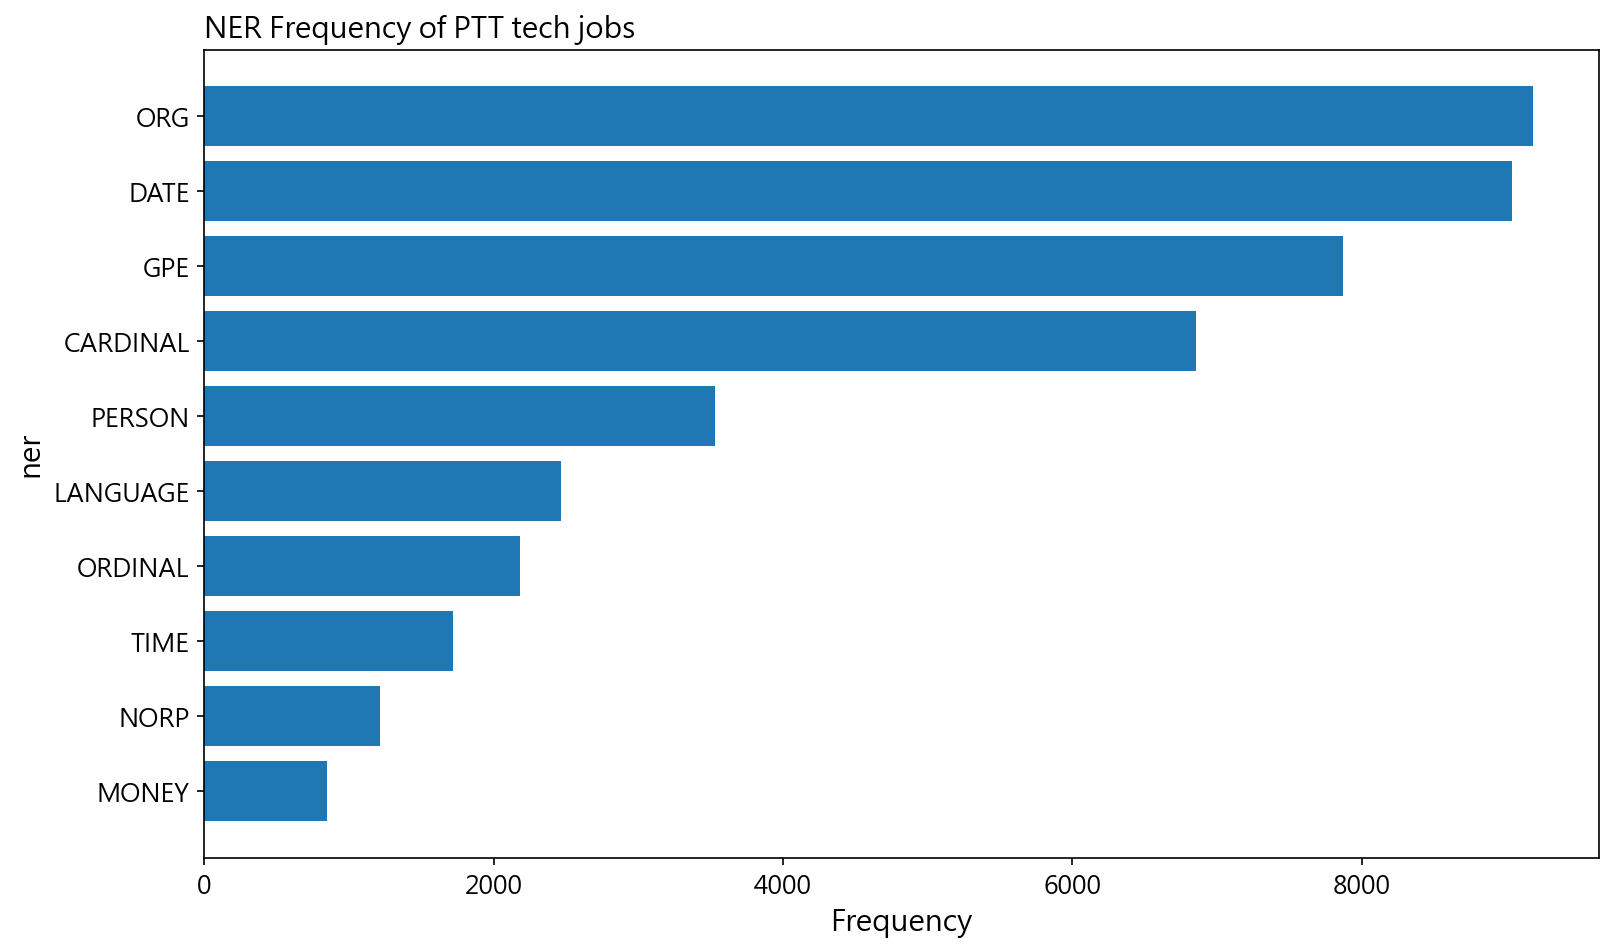

In [431]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency of PTT tech jobs',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

可以看到NER裡面ORG占最多，所以深入來看ORG有哪些名詞

涉及到的組織(ORG)

C:\Users\SHOW\AppData\Local\Temp\ipykernel_27212\1384496336.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


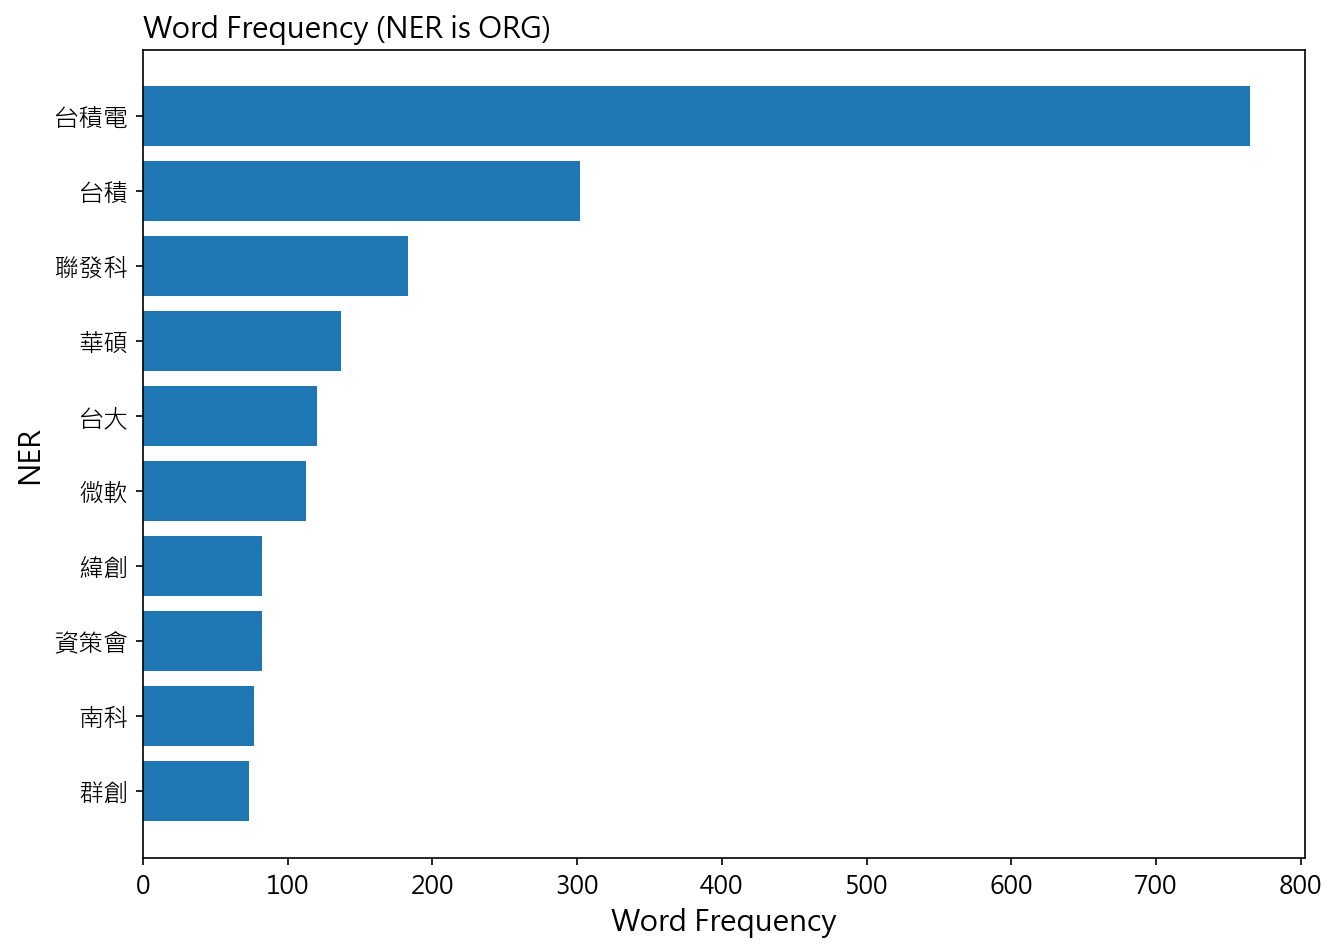

In [432]:
# 篩選ner為ORG的資料
l_noun = ["ORG"]
ORG = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = ORG.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

從上圖得知台積電是最常被討論到的公司，再來是聯發科與華碩

### 3.3 POS種類分析

POS 常見詞性列表
+ Na: 普通名詞
+ D: 副詞
+ VC: 動作及物動詞
+ Nb: 專有名詞
+ FW: 外文
+ VH: 狀態不及物動詞
+ Nh: 代名詞
+ DE: 的之得地
+ P: 介詞
+ VA: 動作不及物動詞
+ T: 語助詞
+ SHI: 是

計算除了標點符號外，POS的各類總數

In [435]:
pos_filter = pos_table[~pos_table.pos.isin(['COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY'])]

pos_count = pos_filter.groupby(['pos'])['pos'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(12)

C:\Users\SHOW\AppData\Local\Temp\ipykernel_27212\2478466374.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


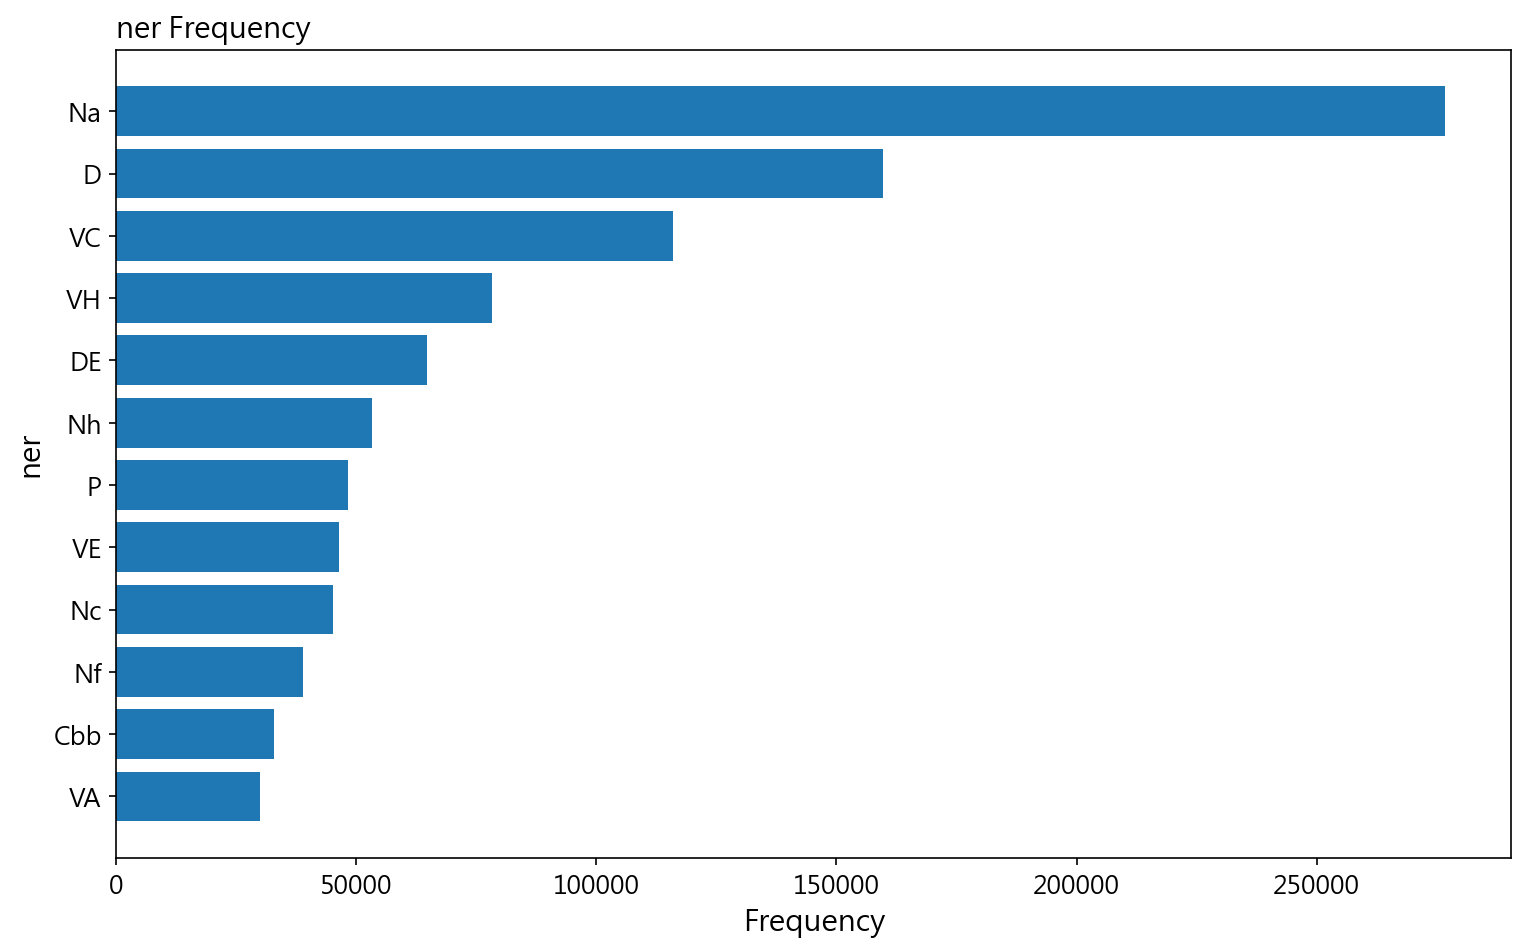

In [436]:
pos = pos_count['pos']
count = pos_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(pos, count)
ax.invert_yaxis()
ax.set_title('ner Frequency',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

由上圖得知普通名詞(Na)佔最多數

深入分析普通名詞(Na)有出現哪些詞語

In [437]:
# 篩選pos為專有名詞的資料
l_noun = ["Na"] #,"Na"
noun = pos_table[pos_table.pos.isin(l_noun)]

# 計算每個名詞提到的次數，選出前15個
noun_count = noun[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)

C:\Users\SHOW\AppData\Local\Temp\ipykernel_27212\1614676684.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


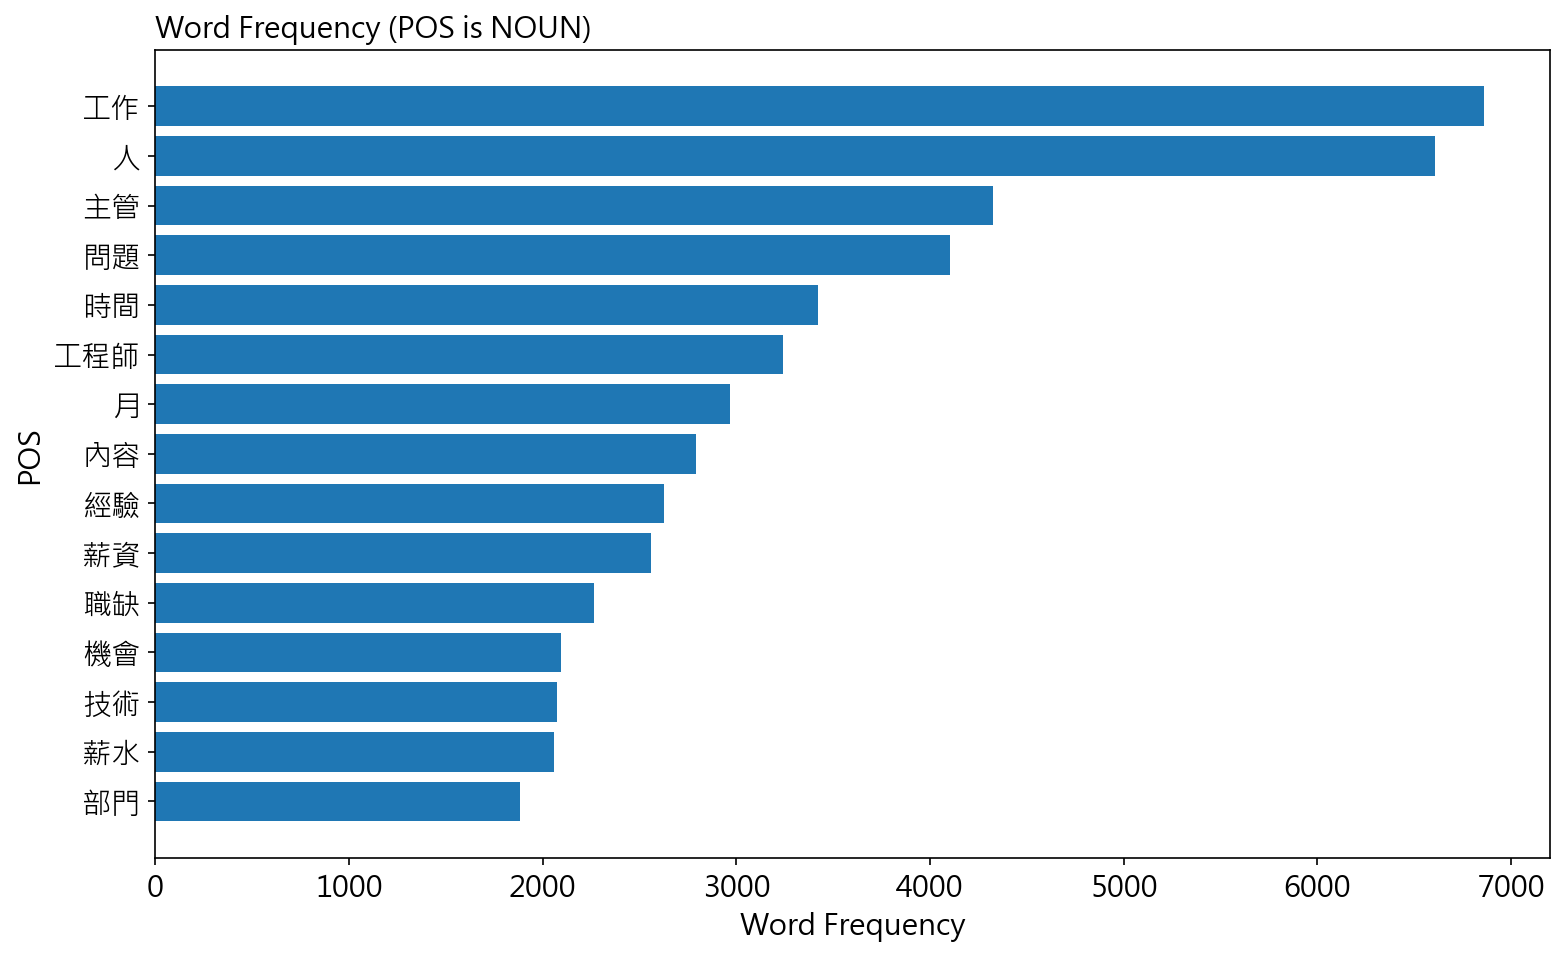

In [452]:
# 設定中文字形
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
word = noun_count['word']
count = noun_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is NOUN)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

從上圖可以看到大家都是討論"工作"上的議題，除此之外對於"主管"，"時間"可能跟上下班時間有關，也有不少討論